### Assignment 4

Name: Zenas Huang

In [1]:
#Standard Imports
import numpy as np
import math
import random
import pandas as pd
#Visualization packages
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Read in data
data = pd.read_csv('classification.txt',header=None)
data.columns = ['x1','x2','x3','4th','5th']
data.head()

,x1,x2,x3,4th,5th
0,0.750072,0.977408,0.885658,-1,1
1,0.877914,0.019251,0.506711,1,-1
2,0.777325,0.994066,0.822244,-1,1
3,0.181158,0.460749,0.525477,-1,1
4,0.114564,0.067555,0.128920,-1,1


#### Perceptron Learning<br>
Implement the Perceptron Learning algorithm. Run it on the data file "classification.txt" ignoring the 5th column. That is, consider only the first 4 columns in each row. The first 3 columns are the coordinates of a point; and the 4th column is its classification label +1 or -1. Report your results (weights and accuracy after the final iteration).

In [3]:
#Use the first three columns as point coordinates
X = np.asarray(data[['x1','x2','x3']])
#grab fourth column as labels
y = np.asarray(data['4th'])

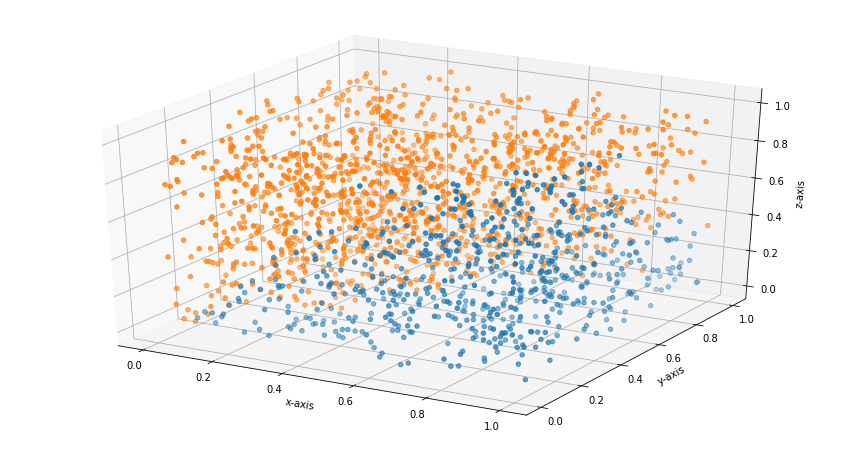

In [4]:
#Preliminary Data Visualization
group1 = data.loc[data['4th']== 1]
group1 = np.asarray(group1[['x1','x2','x3']])
group2 = data.loc[data['4th']== -1]
group2 = np.asarray(group2[['x1','x2','x3']])
fig = plt.figure(figsize=(15,8))
#label = np.unique(Y)
#colors = ['red','blue']
ax = fig.add_subplot(111,projection='3d')
#for c, m in [('r','o'),('b','^')]:
x1 = group1[:,0]
y1 = group1[:,1]
z1 = group1[:,2]
x2= group2[:,0]
y2= group2[:,1]
z2= group2[:,2]
ax.scatter(x1,y1,z1,cmap='red')
ax.scatter(x2,y2,z2,cmap='blue')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show();

Note that the Data is Linearly Separable when Column 4 is the label.

In [5]:
#Pad constant x0 = 1 to the data for w0 weight to enable all logic gate operations
X = np.insert(X, 0, 1, axis=1)

In [6]:
class Perceptron():
    def __init__(self, weights=None, eta=0.01, num_iters=1000):
        self.eta = eta
        self.num_iters = num_iters
        self.weights = weights      
        self.violations = []
    
    def fit(self, X, y):
        #initialize random weights
        self.weights = np.random.random(X.shape[1])
        for iteration in range(self.num_iters):
            self.violations.append(None)
            #update weights using instance-label pairs
            for coord, label in zip(X, y):
                lc = np.dot(coord, self.weights)
                if np.sign(lc) == 1 and label ==-1: #violation case 1
                    self.weights += self.eta *(label - np.sign(lc))*coord
                elif np.sign(lc) == -1 and label == 1: #violation case 2
                    self.weights += self.eta *(label - np.sign(lc))*coord

#Store current predictions and update number of remaining violations in current iteration 
            yhat = np.sign(np.dot(X, self.weights))
            self.violations[-1] = np.where(yhat!=y)[0].shape[0]
            #If no more violations, then quit training
            if self.violations[-1] == 0:
                break
    
    def predict(self, X):
        return np.sign(np.dot(X, self.weights))

In [7]:
#Fix random state for reproducibility
np.random.seed(0)
#Instantiate a perceptron
percept = Perceptron()
#Train the Perceptron
percept.fit(X,y)

In [8]:
finalweights = percept.weights
print('Perceptron Final Weights \n', finalweights)

Perceptron Final Weights 
 [-0.0111865   1.79844173 -1.43872591 -1.06058332]


In [9]:
predictions = percept.predict(X)
Correct = np.where(y==predictions)[0].shape[0]
Total = len(y)
accuracy = round(Correct/Total,2)*100
print('Perceptron Final Accuracy:',str(accuracy)+'%')

Perceptron Final Accuracy: 100.0%


#### Pocket Algorithm<br>
Implement the Pocket algorithm and run it on the data file "classification.txt" ignoring the 4th column. That is, consider only the first 3 columns and the 5th column in each row. The first 3 columns are the coordinates of a point; and the 5th column is its classification label +1 or -1. Plot the number of misclassified points against the number of iterations of the algorithm. Run up to 7000 iterations. Also, report your results (weights and accuracy after the final iteration).

In [10]:
#Use the first three columns as point coordinates
X = np.asarray(data[['x1','x2','x3']])
#grab fifth column as labels
y = np.asarray(data['5th'])

In [11]:
#Pad constant x0 = 1 to the data for w0 weight to enable all logic gate operations
X = np.insert(X, 0, 1, axis=1)

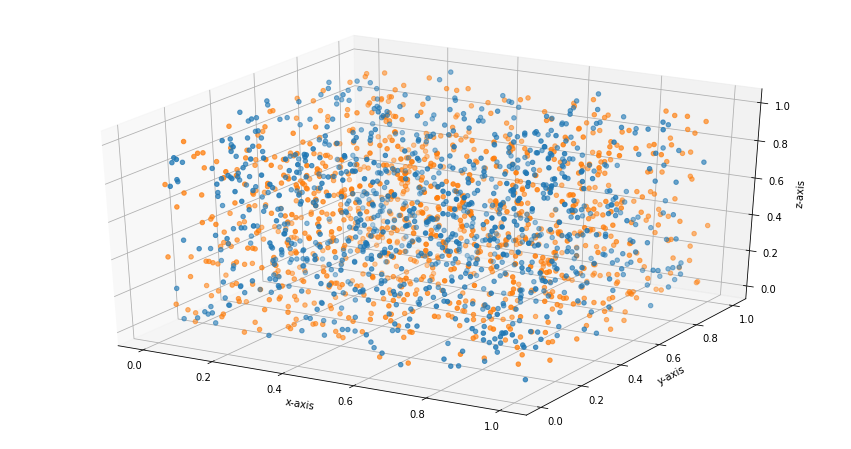

In [12]:
#Visualize the data now that the 5th column is used as label
group1 = data.loc[data['5th']== 1]
group1 = np.asarray(group1[['x1','x2','x3']])
group2 = data.loc[data['5th']== -1]
group2 = np.asarray(group2[['x1','x2','x3']])
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111,projection='3d')
x1 = group1[:,0]
y1 = group1[:,1]
z1 = group1[:,2]
x2=group2[:,0]
y2=group2[:,1]
z2=group2[:,2]
ax.scatter(x1,y1,z1,cmap='red')
ax.scatter(x2,y2,z2,cmap='blue')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show();

We observe that the data is now very much not linearly separable when the 5th column is used as the label.

In [13]:
class PocketLearner():
    def __init__(self, weights=None, eta=0.01, num_iters=7000):
        self.weights = weights      
        self.violations = []
        self.eta = eta
        self.num_iters = num_iters
        self.pocketweights=[]
        self.pocketlist=[]
        self.leastviolationsoFar = 5000 #since there are only 2000 constraints to violate
        self.pockitertracker = []
        self.itertracker = []
        self.violtracker = []
        
    def fit(self, X, y):
        #initialize random weights
        self.weights = np.random.random(X.shape[1])
        for iteration in range(self.num_iters):
            #update violated instance-label pairs
            for coord, label in zip(X, y):
                lc = np.dot(coord, self.weights)
                if np.sign(lc) == 1 and label ==-1: #violation case 1
                    self.weights += self.eta *(label - np.sign(lc))*coord
                elif np.sign(lc) == -1 and label == 1: #violation case 2
                    self.weights += self.eta *(label - np.sign(lc))*coord

#Store current predictions and number of remaining violations in current iteration 
            yhat = np.sign(np.dot(X, self.weights))
            self.violations.append(len(np.where(yhat!=y)[0]))
            self.itertracker.append(iteration)
            if  (self.violations[-1] < self.leastviolationsoFar):
                self.leastviolationsoFar = self.violations[-1]
                #store best current weights so far in pocket
                self.pocketweights = np.copy(self.weights)
            self.pocketlist.append(self.pocketweights)
            self.violtracker.append(self.leastviolationsoFar)
            self.pockitertracker.append(iteration)
            #If no more violations, then quit training
            if self.violations[-1] == 0:
                break
            
    def predict(self, X):
        return np.sign(np.dot(X, self.pocketweights))

In [14]:
#Note this cell may take a few minutes
#Fix random state for reproducibility
np.random.seed(0)
#Instantiate Pocket Algorithm instance
pocket = PocketLearner()
#Train pocket algorithm
pocket.fit(X,y)

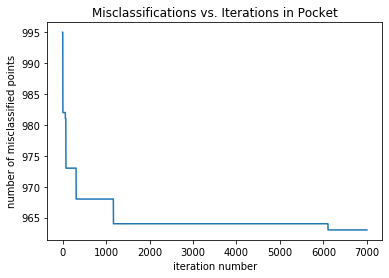

In [15]:
plt.plot(pocket.pockitertracker,pocket.violtracker)
plt.xlabel('iteration number')
plt.ylabel('number of misclassified points')
plt.title('Misclassifications vs. Iterations in Pocket')
plt.show();

In [16]:
finalweights = pocket.pocketweights
print('Pocket Algorithm Final Weights: \n', finalweights)

Pocket Algorithm Final Weights: 
 [ 0.0088135  -0.01753843  0.01015483 -0.00812551]


In [17]:
#Accuracy
predictions = pocket.predict(X)
Correct = np.where(y==predictions)[0].shape[0]
Total = len(y)
accuracy = Correct/Total*100
print('Pocket Algorithm Final Accuracy:',str(round(accuracy,2))+'%')

Pocket Algorithm Final Accuracy: 51.85%


#### Logistic Regression<br>
Implement Logistic Regression and run it on the points in the data file "classification.txt" ignoring the 4th column. That is, consider only the first 3 columns and the 5th column in each row. The first 3 columns are the coordinates of a point; and the 5th column is its classification label +1 or -1. Use the sigmoid function Ɵ(s) = es/(1+es). Run up to 7000 iterations. Report your results (weights and accuracy after the final iteration).

In [18]:
#Use first 3 columns as coordinates
X = np.asarray(data[['x1','x2','x3']])
#Use 5th column as label
y = np.asarray(data['5th'])

N.b. It can be shown that  $\Theta(s) = \frac{e^{s}}{1+e^{s}} = \frac{1}{1+e^{-s}}$, simply by multiplying the Left hand side's numerator and denominator by $\frac{1}{e^{s}}$.

In [19]:
class LogisticRegression():
    def __init__(self, eta=0.01, num_iters=7000):
        self.eta = eta
        self.num_iters = num_iters
        
    def sigmoid(self, z):
        #np.exp(z)/(1+np.exp(z)) is equivalent to 1/(1+np.exp(-z))
        return 1/(1 + np.exp(-z))
    
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        for iterations in range(self.num_iters):
            threshold = 0.5
            z = np.dot(X, self.weights)
            logit = self.sigmoid(z)
            yhat = np.where(logit>=threshold,1,-1)
            gradient = np.dot(X.T, (y-yhat)) / y.size
            self.weights += self.eta * gradient
    
    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.weights))

In [20]:
#Use first 3 columns as coordinates
X = np.asarray(data[['x1','x2','x3']])
#Use 5th column as label
y = np.asarray(data['5th'])
#pad the constant 1 column to the data for x0.
X = np.insert(X, 0, 1, axis=1)

In [21]:
#Fix random state
np.random.seed(0)
#instantiate logistic regression instance
logreg = LogisticRegression()
#fit the logistic regression
logreg.fit(X,y)

In [22]:
weights = logreg.weights
print('Logistic Regression Final Weights: \n',weights)

Logistic Regression Final Weights: 
 [ 0.0005635  -0.01777426 -0.00054697 -0.00122984]


In [23]:
logits = logreg.predict_prob(X)
predictions = np.where(logits>=0.5,1,-1)
correct = len(np.where(y==predictions)[0])
total = len(y)
accuracy = (correct/total)*100
print('Logistic Regression Final Accuracy: ',str(round(accuracy,2))+'%')

Logistic Regression Final Accuracy:  50.65%


The accuracy is again much lower because the data is not linearly separable when using column 5 as labels.

#### Linear Regression<br>
Implement Linear Regression and run it on the points in the data file "linear-regression.txt". The first 2 columns in each row represent the independent X and Y variables; and the 3rd column represents the dependent Z variable. Report your results (weights after the final iteration).


In [24]:
#Read in Linear Regression Data
lr_data = pd.read_csv('linear-regression.txt',header=None)
lr_data.columns = ['x1','x2','y']
plotdata = np.asarray(lr_data)
lr_data.head()

,x1,x2,y
0,0.693781,0.697544,3.252290
1,0.693737,0.575576,2.898651
2,0.000576,0.458192,1.986979
3,0.194953,0.470199,2.272075
4,0.031775,0.026546,0.231178


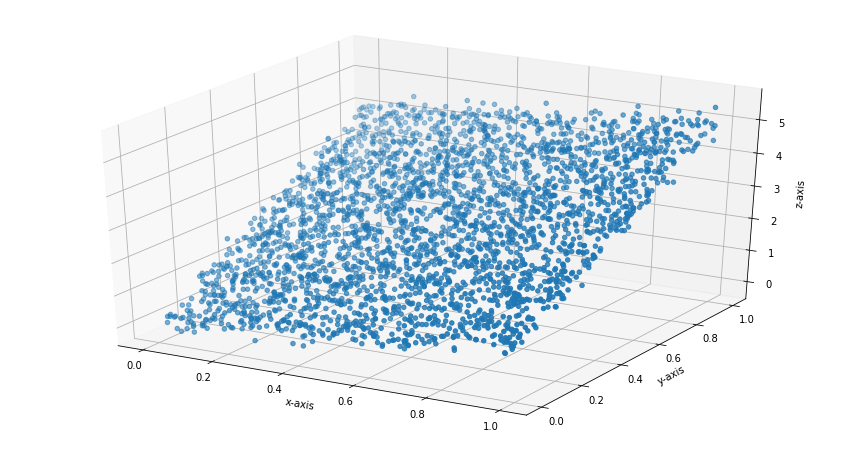

In [25]:
#Data Visualization
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(plotdata[:,0],plotdata[:,1],plotdata[:,2])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show();

In [26]:
X = np.asarray(lr_data[['x1','x2']]) #independent (X,Y variables)
y = np.asarray(lr_data['y']) #dependent Z variable

In [27]:
#Append a constant 1 to the data for bias term
X = np.insert(X, 0, 1, axis=1)

In [28]:
class LinearRegression():
    def __init__(self, eta = 0.01,num_iters =1000):
        self.eta = eta
        self.num_iters = num_iters
        
    def fit(self,X,y):
        self.cost =[]
        self.itertracker=[]
        self.weights = np.random.rand(X.shape[1])
        m = len(X)
        for iterations in range(self.num_iters):
            yhat = np.dot(X,self.weights)
            self.cost.append(((yhat-y)**2).mean())
            self.weights -= self.eta*np.dot((yhat-y),X)/m
            self.itertracker.append(iterations)
    def predict(self,X):
        return np.dot(X,self.weights)

In [29]:
#Set random state for reproducibility
np.random.seed(0)
#Call a Linear Regression Object
linreg = LinearRegression()
#Fit the linear regression on the data and labels 
linreg.fit(X,y)

In [30]:
finalweights = linreg.weights
print('Linear Regression Final Weights: \n', finalweights)

Linear Regression Final Weights: 
 [0.88436499 0.91453353 2.51013005]


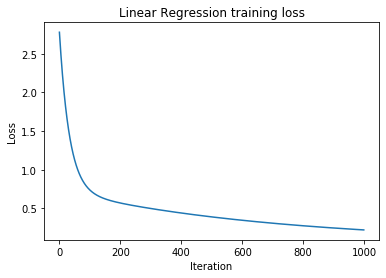

In [31]:
plt.plot(linreg.itertracker,linreg.cost);
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Linear Regression training loss')
plt.show();